In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score, roc_auc_score, confusion_matrix,RocCurveDisplay)
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [13]:
df = pd.read_csv("heart.csv")

In [14]:
df = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

In [16]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)


In [20]:
model = XGBClassifier(n_estimators=500, learning_rate=0.01, max_depth=5,subsample=0.85,colsample_bytree=0.85,use_label_encoder=False, eval_metric='logloss',random_state=42)


In [21]:
model.fit(X_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.85, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [22]:
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]


In [23]:
optimal_threshold = 0.5  # You can adjust this based on ROC analysis
y_pred_adjusted = (y_proba >= optimal_threshold).astype(int)

In [24]:
print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_adjusted):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_adjusted):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_adjusted):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_adjusted):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.2f}")



Test Set Performance:
Accuracy: 0.90
Precision: 0.92
Recall: 0.90
F1-Score: 0.91
ROC AUC: 0.94


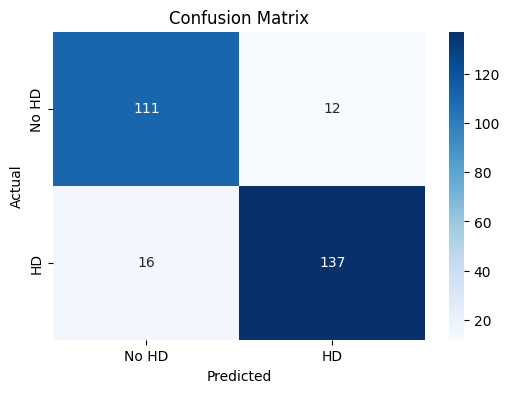

In [25]:
cm = confusion_matrix(y_test, y_pred_adjusted)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No HD', 'HD'], 
            yticklabels=['No HD', 'HD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


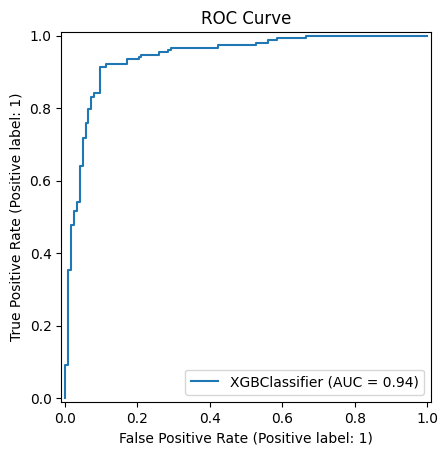

In [26]:
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title('ROC Curve')
plt.show()

In [27]:
from joblib import dump
dump(model, 'XGBV4.joblib')

['XGBV4.joblib']